# Selecting optimal Threshold for Binary Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import make_classification

In [3]:
from sklearn.model_selection import train_test_split
X, Y = make_classification(n_samples=2000,n_classes=2,weights=[1,1],random_state=1)

In [4]:
X.shape

(2000, 20)

In [5]:
Y.shape

(2000,)

In [6]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y,test_size=0.3,random_state=1)

In [8]:
from sklearn.metrics import roc_auc_score, roc_curve

## Random Forests

In [9]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train,Y_train)
ytrain_pred = rf_model.predict_proba(X_train)
ytest_pred = rf_model.predict_proba(X_test)
print("RF train ROC-AUC:{}".format(roc_auc_score(Y_train,ytrain_pred[:,1])))
print("RF test ROC-AUC:{}".format(roc_auc_score(Y_test,ytest_pred[:,1])))

RF train ROC-AUC:1.0
RF test ROC-AUC:0.9822055555555556


## Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(X_train, Y_train)
ytrain_pred = log_classifier.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(Y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(Y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.9863568922694498
Logistic test roc-auc: 0.9885777777777777


## Adaboost Classifier

In [12]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, Y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(Y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(Y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.9975081174960356
Adaboost test roc-auc: 0.9826111111111111


## KNN Classifier

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, Y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(Y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(Y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.981670071491109
Adaboost test roc-auc: 0.9426111111111111


## Selecting the threshold

In [14]:
pred= []
for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_pred = pd.concat(pred,axis=1).mean(axis=1)

print("Ensemble test ROU-AUC: {}".format(roc_auc_score(Y_test,final_pred)))

Ensemble test ROU-AUC: 0.9851444444444445


In [15]:
final_pred

0      0.887762
1      0.125823
2      0.821283
3      0.740353
4      0.582447
         ...   
595    0.126340
596    0.115345
597    0.876697
598    0.165717
599    0.834857
Length: 600, dtype: float64

In [16]:
fpr,tpr,thresholds = roc_curve(Y_test,final_pred)
thresholds

array([1.91424686, 0.91424686, 0.9084413 , 0.90827475, 0.80948866,
       0.80912833, 0.78877646, 0.7880558 , 0.77219585, 0.77071156,
       0.75245214, 0.75037124, 0.71407482, 0.71143711, 0.69044088,
       0.67743537, 0.59779968, 0.59425354, 0.59146627, 0.59114346,
       0.58244674, 0.58050386, 0.57149047, 0.56736186, 0.55558969,
       0.55127948, 0.55088469, 0.52969563, 0.52605932, 0.48616892,
       0.4496034 , 0.38920009, 0.38879719, 0.34886723, 0.34836612,
       0.23349466, 0.22896893, 0.21144743, 0.20348417, 0.1256704 ,
       0.1253351 , 0.10498954])

In [18]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_pred>thres,1,0)
    accuracy_ls.append(accuracy_score(Y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
30,0.449603,0.961667
29,0.486169,0.958333
25,0.551279,0.958333
28,0.526059,0.956667
27,0.529696,0.956667


In [19]:

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

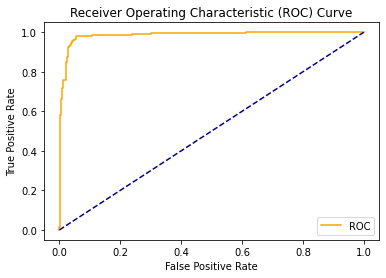

In [20]:
plot_roc_curve(fpr,tpr)